<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB
None
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0

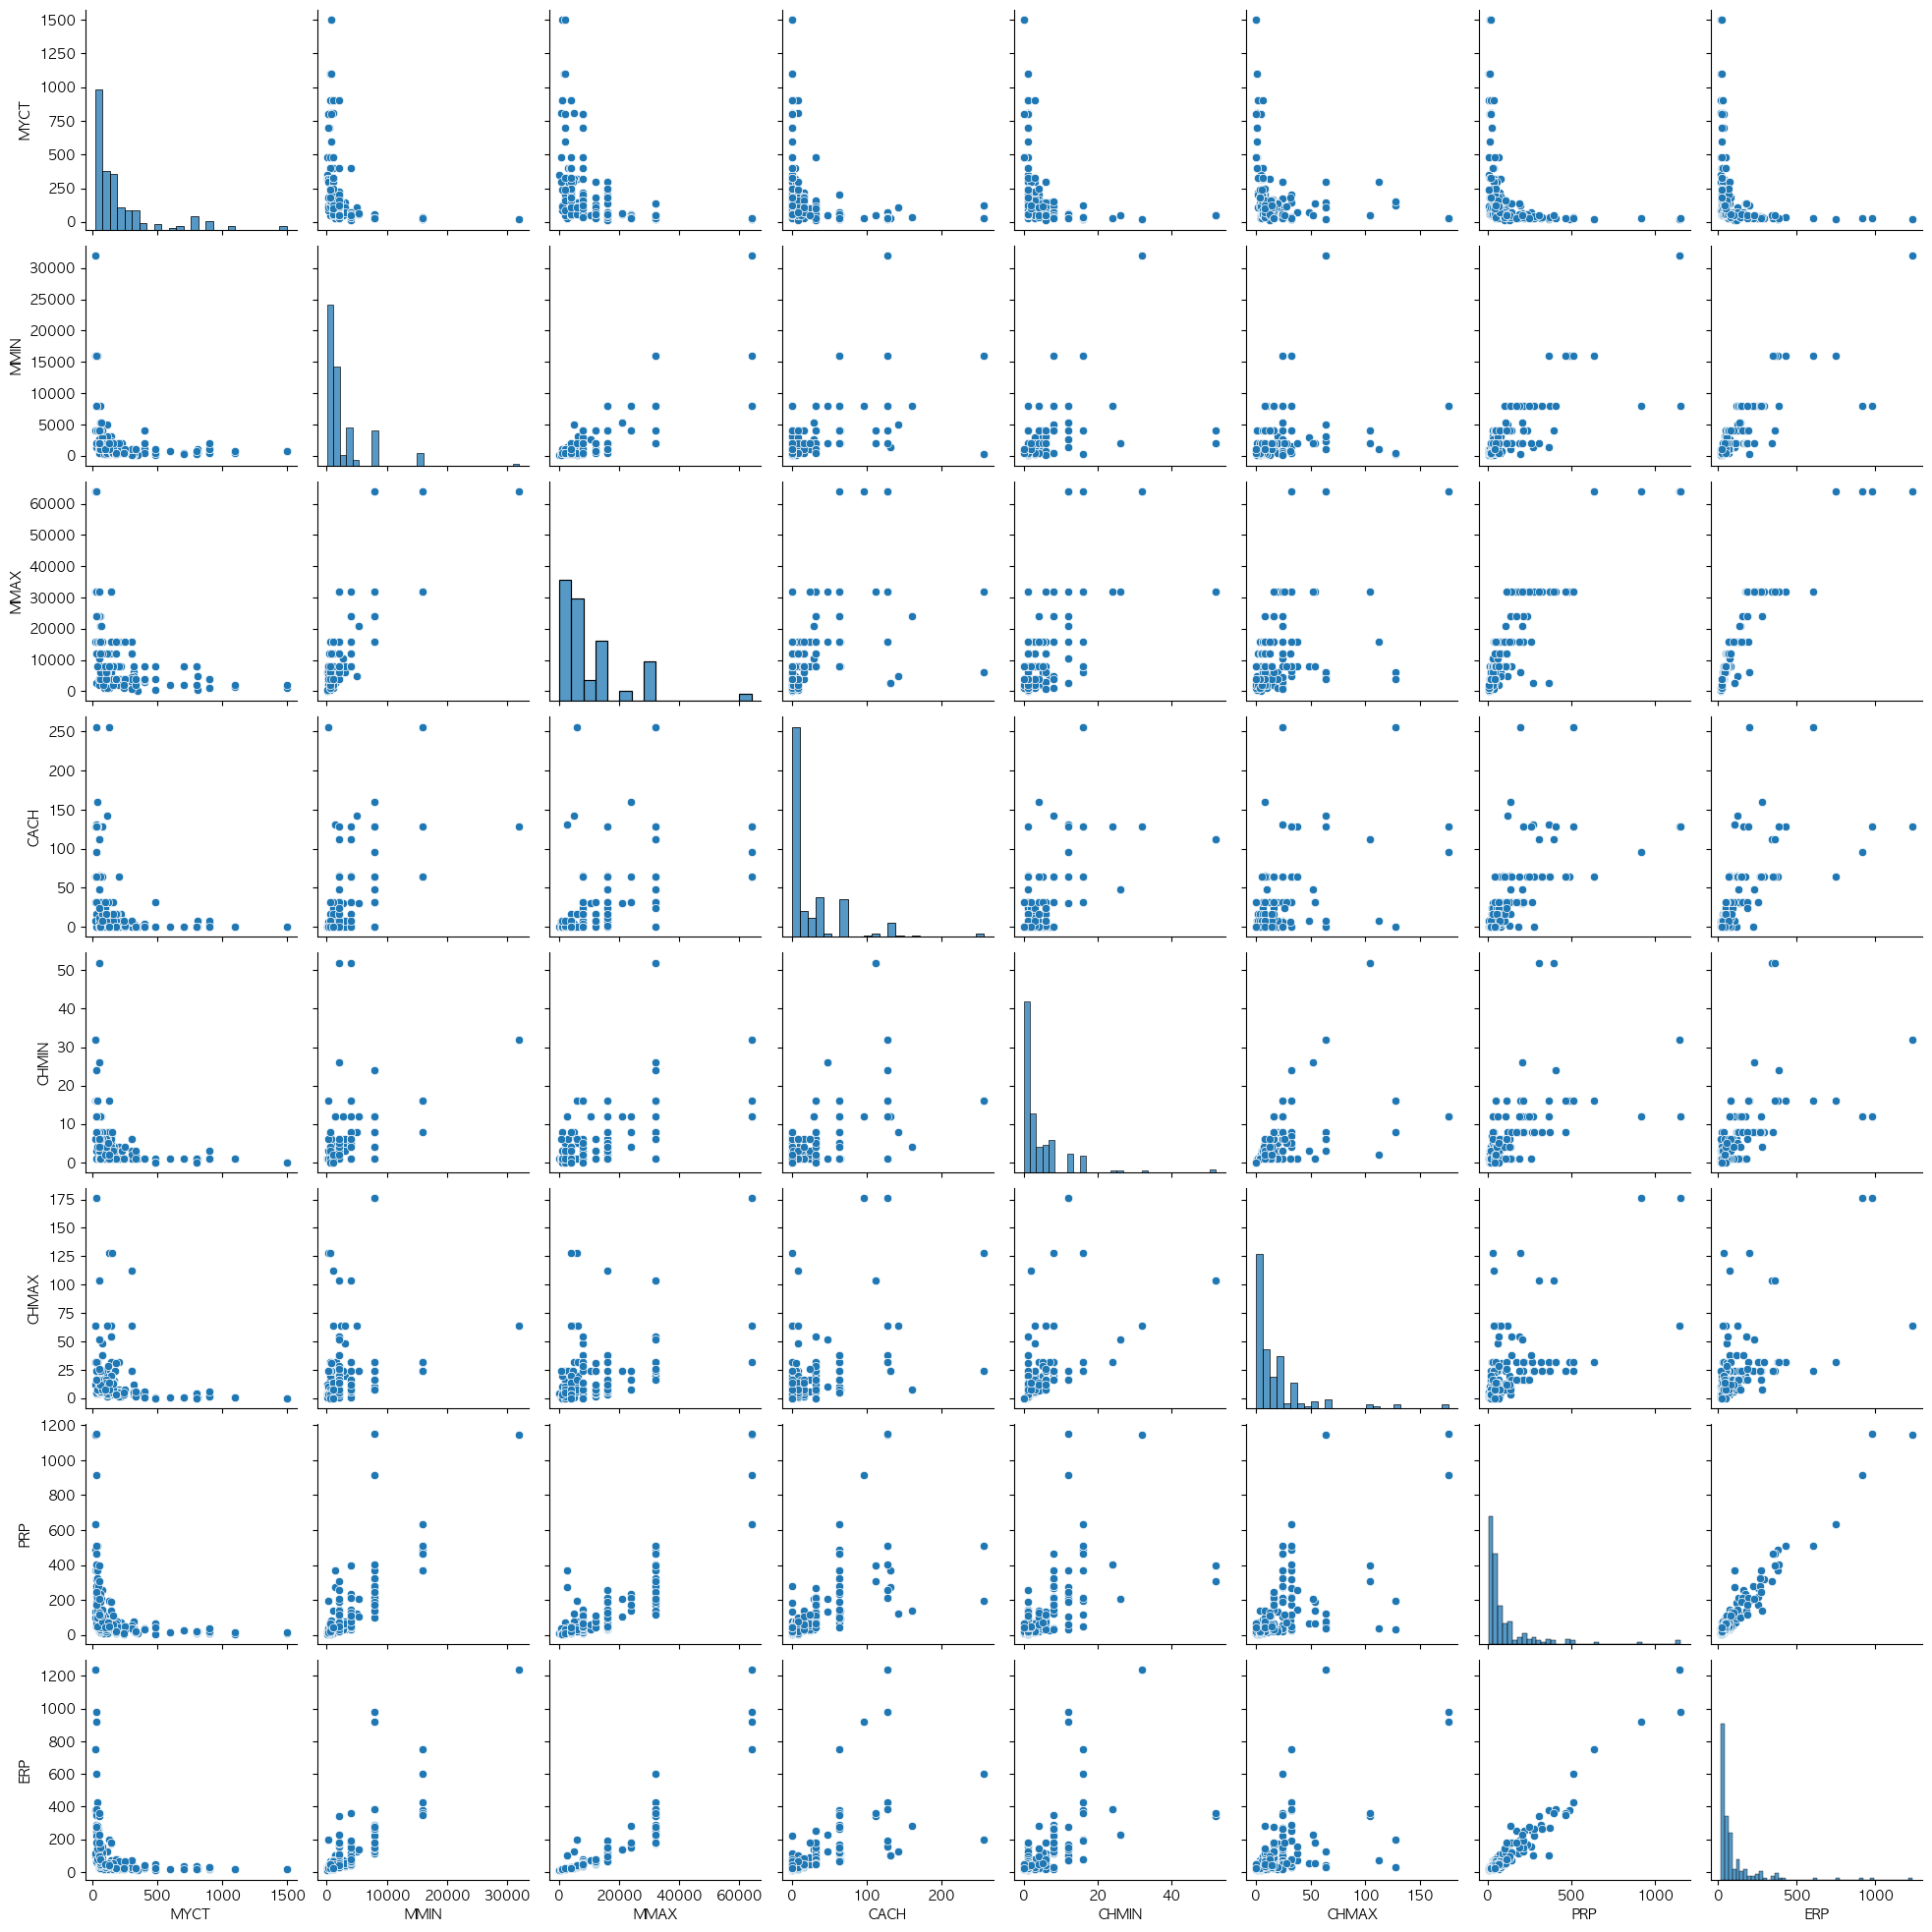

VendorName    19
ModelName      0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64
Train MSE: 1.4352893151429345e-23
Train MAE: 2.4378627771463805e-12
Train R^2: 1.0
교차 검증 MSE (Train): [3497.07196406 2038.75350763  672.61946645 1021.2697075  2573.21236289]
Test MSE: 2448.3334093095277
Test MAE: 27.39032087184457
Test R^2: 0.9631589009231346
교차 검증 MSE (Test): [35457.54765169  2675.7270596  13860.20805131 13721.42248512
   489.13078115]


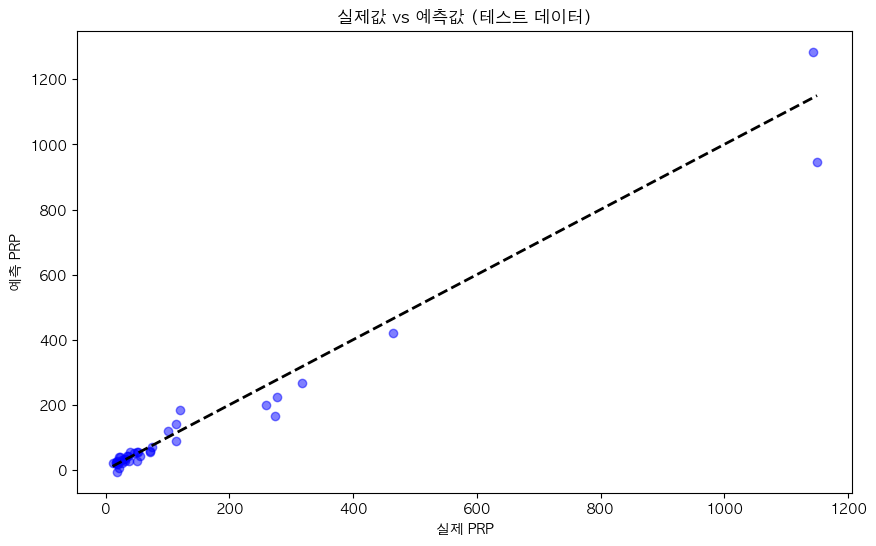

/Users/johyeon-u/python_basic/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


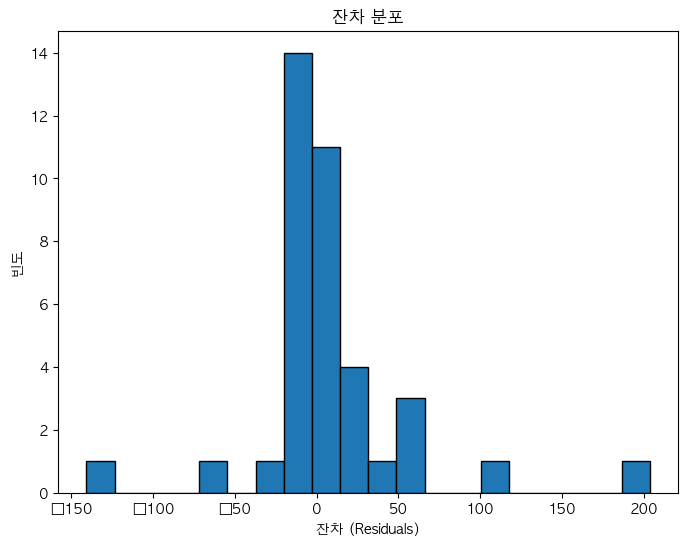

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# 맥북 언어 
plt.rcParams["font.family"] = 'AppleGothic'


data = pd.read_csv('machine.data_update.csv')

print(data.info())
print(data.describe())

sns.pairplot(data)
plt.show()

# 데이터 전처리
data.replace('nas', np.nan, inplace=True)

# 결측치 확인 및 처리
print(data.isnull().sum())

# 결측치가 있는 행 제거
data.dropna(inplace=True)

# 문자열 데이터를 숫자로 변환 (One-Hot Encoding)
data = pd.get_dummies(data)

# features 와 target 분리
X = data.drop(columns=['PRP'])
y = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#모델 학습 -- 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습 데이터 예측
y_train_pred = model.predict(X_train)

# Mean Squared Error - 학습 데이터
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Train MSE: {mse_train}')

# Mean Absolute Error - 학습 데이터
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Train MAE: {mae_train}')

# R-squared - 학습 데이터
r2_train = r2_score(y_train, y_train_pred)
print(f'Train R^2: {r2_train}')

# 교차 검증 (Cross-validation) - 학습 데이터
cv_scores_train = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_train = -cv_scores_train  # cross_val_score는 음수 MSE를 반환하므로 양수로 변환
print(f'교차 검증 MSE (Train): {cv_mse_train}')

# 테스트 데이터 예측
y_test_pred = model.predict(X_test)

# Mean Squared Error - 테스트 데이터
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Test MSE: {mse_test}')

# Mean Absolute Error - 테스트 데이터
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Test MAE: {mae_test}')

# R-squared (R^2) - 테스트 데이터 ( 테스트 데이터의 R^2가 90%이상 나옴)
r2_test = r2_score(y_test, y_test_pred)
print(f'Test R^2: {r2_test}')

# 교차 검증 (Cross-validation) - 테스트 데이터
cv_scores_test = cross_val_score(model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
cv_mse_test = -cv_scores_test  # cross_val_score는 음수 MSE를 반환하므로 양수로 변환
print(f'교차 검증 MSE (Test): {cv_mse_test}')

# 테스트 데이터에 대한 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('실제 PRP')
plt.ylabel('예측 PRP')
plt.title('실제값 vs 예측값 (테스트 데이터)')
plt.show()

# 잔차 분석 시각화
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('잔차 (Residuals)')
plt.ylabel('빈도')
plt.title('잔차 분포')
plt.show()
